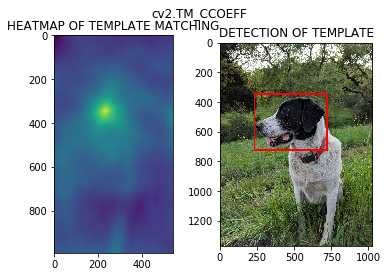

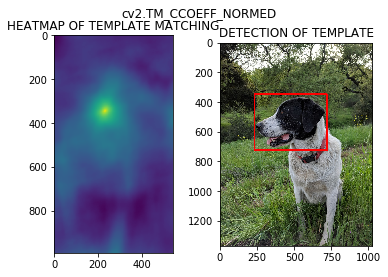

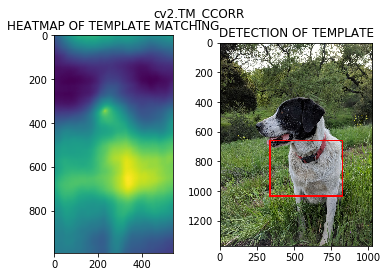

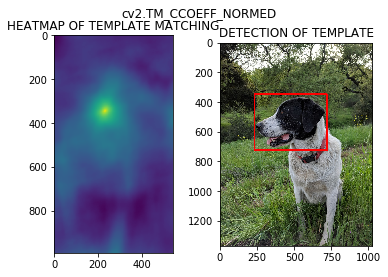

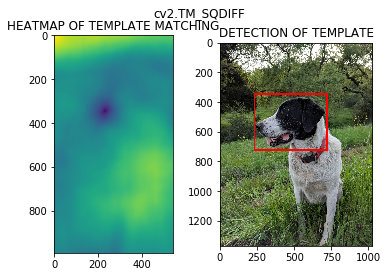

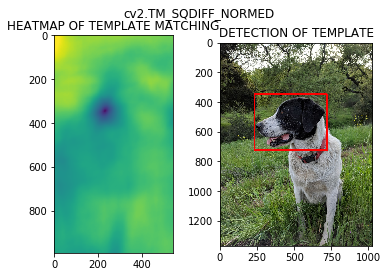

In [6]:
'''Template matching is the simplest form of object detection.
It simply scans a larger image for a provided template by slicing the template
target image across a larger image. It has to be an exact match.'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#full image that will be searched by the template
full_img = cv2.imread('../DATA/sammy.jpg')

full_img = cv2.cvtColor(full_img,cv2.COLOR_BGR2RGB)

#subset image
face = face = cv2.imread('../DATA/sammy_face.jpg')
''
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

#all the 6 methods for comparison in a list
method = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED' , 'cv2.TM_CCORR',
           'cv2.TM_CCOEFF_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in method:
    #create a copy of the image
    full_copy_img = full_img.copy()
    
    #use eval to convert to function
    method = eval(m)
    
    #template matching
    result = cv2.matchTemplate(full_copy_img,face, method)
    
    #grab min and max values from hitmap
    
    min_val, max_val, min_location, max_location = cv2.minMaxLoc(result)
    
    #top left location
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_location #(x,y)
    else:
        top_left = max_location
    
    #bottom right
    height, width, channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    #draw on image
    cv2.rectangle(full_copy_img, top_left, bottom_right,(255,0,0), thickness = 10)
    
    #plot and show images
    plt.subplot(121)
    plt.imshow(result)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy_img)
    plt.title('DETECTION OF TEMPLATE')
    
    #title of method
    plt.suptitle(m)
    
    plt.show()
    print('\n \n')
    